<a href="https://colab.research.google.com/github/trsk3333/chatgpt/blob/main/chatgpt_03_hf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ChatGpt 3 házifeladat

Ahhoz, hogy a matplotlib működjön a Google Colab-ben futtatni kell a következő cellát

In [1]:
%matplotlib inline

Az allábbi parancs is szükséges, ezt a legtöbb modell elrontotta:

In [2]:
!pip install hu_core_news_lg@https://huggingface.co/huspacy/hu_core_news_lg/resolve/main/hu_core_news_lg-any-py3-none-any.whl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.5/401.5 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 93.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 108.3 MB/s eta 0:00:00
  Attempting uninstall: blis
    Found existing installation: blis 0.7.11
    Uninstalling blis-0.7.11:
      Successfully uninstalled blis-0.7.11
  Attempting uninstall: thinc
    Found existing installation: thinc 8.2.5
    Uninstalling thinc-8.2.5:
      Successfully uninstalled thinc-8.2.5
  Attempting uninstall: spacy
    Found existing installation: spacy 3.7.5
    Uninstalling spacy-3.7.5:
      Successfully uninstalled spacy-3.7.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.7.1 requires spacy<3.8.0,>=3.7.2, but you have 

## Promt:

Egy senior python fejlesztő vagy, aki szintén ért a matematikához, azon belül a kedvenc területed a gráfelmélet. A feladatod a következő: Írj egy olyan programot ami megkeresi az alábbi szövegben az összes alanyt, állítmányt és tárgyat, majd készít egy gráfot pythonban! A gráf élei legyenek az állítmányok, csúcsai az alany és a tárgy.

Rejtő Jenő (született Reich, írói álnevei: P. Howard, Gibson Lavery) (Budapest, Erzsébetváros, 1905. március 29.[6] – Jevdakovo(wd), Kamenkai járás, Voronyezsi terület, oroszországi megszállt övezet, Szovjetunió, 1943. január 1.) magyar író, kabaré- és színpadi szerző, filmíró, a magyar szórakoztató irodalom népszerű képviselője és megújítója.

Legismertebb művei látszatra ponyvaregények, azonban életművét ma már nagyra értékelik. Kamaszkorában verseket írt (ezeket nem publikálta), majd 1928-tól komor hangulatú novellákat adott közre a napisajtóban. Az 1930-as évek elején kabarédarabokkal és bohózatokkal jelentkezett a pesti színpadokon. Ezzel egyidőben füzetes ponyvákat, majd operetteket, végül – részben külföldi utazásai során szerzett élményeire támaszkodva – kalandregényeket alkotott. Sajátos stílusát egyéni, groteszk, nyelvi humor és „váratlan abszurd fordulatok, szürreális, gyakran kispolgári figurák és a társadalom fanyar humorba csomagolt kritikája”[7] jellemezte. Legnagyobb sikereit P. Howard álnéven írott ponyvaparódiáival aratta, olvasottsága[8] a Kádár-korban Jókai Móréval vetekedett. A pesti művészi élet ismert alakja volt, barátság fűzte a kor jelentős művészeihez, így például Karinthy Frigyeshez,[9] Kabos Gyulához, Latabár Kálmánhoz, Salamon Bélához is.

## A feladat megoldása ChatGpt-vel:

A ChatGpt nem jelezte, hogy kell telepíteni könyvtárakat.

### Megoldás (kis hibával):

A kódban a `python -m spacy download hu_core_news_lg` nem működik, helyette `pip install hu_core_news_lg@https://huggingface.co/huspacy/hu_core_news_lg/resolve/main/hu_core_news_lg-any-py3-none-any.whl` kell

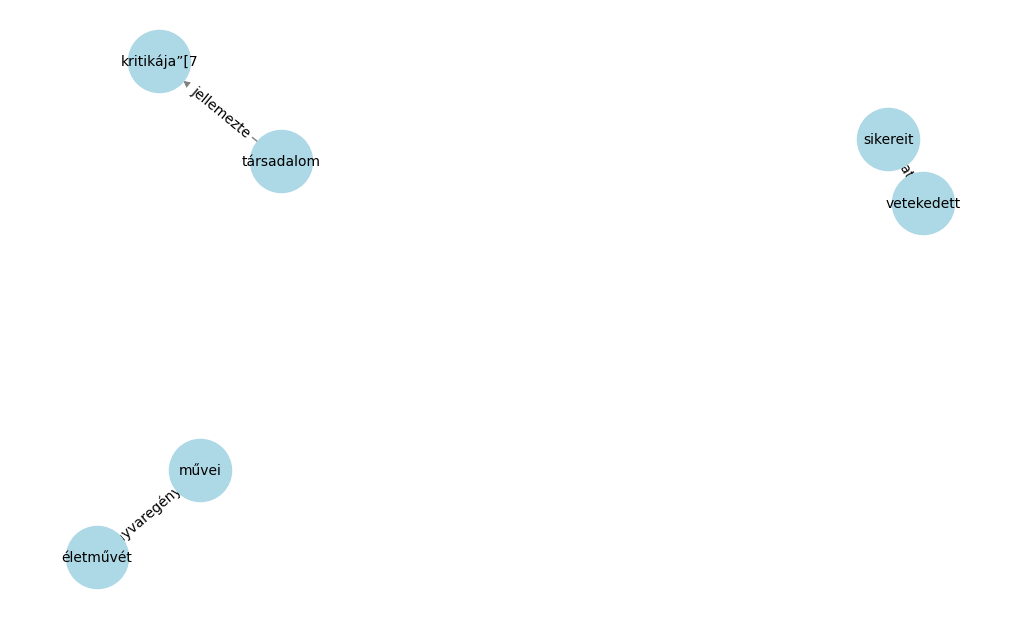

In [5]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt

def extract_spo(text):
    try:
        nlp = spacy.load("hu_core_news_lg")
    except OSError:
        print("A 'hu_core_news_lg' modell nincs telepítve. Telepítsd a következő paranccsal:")
        print("python -m spacy download hu_core_news_lg")
        return []

    doc = nlp(text)
    spo_list = []

    for sent in doc.sents:
        subject, predicate, obj = None, None, None

        for token in sent:
            if "nsubj" in token.dep_:
                subject = token.text
            elif "ROOT" in token.dep_:
                predicate = token.text
            elif "obj" in token.dep_:
                obj = token.text

        if subject and predicate and obj:
            spo_list.append((subject, predicate, obj))

    return spo_list

def create_graph(spo_list):
    G = nx.DiGraph()

    for subject, predicate, obj in spo_list:
        G.add_edge(subject, obj, label=predicate)

    return G

def draw_graph(G):
    pos = nx.spring_layout(G)
    plt.figure(figsize=(10, 6))

    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=10)
    edge_labels = {(u, v): d['label'] for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

    plt.show()

if __name__ == "__main__":
    text = """Rejtő Jenő (született Reich, írói álnevei: P. Howard, Gibson Lavery) (Budapest, Erzsébetváros, 1905. március 29.[6] – Jevdakovo(wd), Kamenkai járás, Voronyezsi terület, oroszországi megszállt övezet, Szovjetunió, 1943. január 1.) magyar író, kabaré- és színpadi szerző, filmíró, a magyar szórakoztató irodalom népszerű képviselője és megújítója. Legismertebb művei látszatra ponyvaregények, azonban életművét ma már nagyra értékelik. Kamaszkorában verseket írt (ezeket nem publikálta), majd 1928-tól komor hangulatú novellákat adott közre a napisajtóban. Az 1930-as évek elején kabarédarabokkal és bohózatokkal jelentkezett a pesti színpadokon. Ezzel egyidőben füzetes ponyvákat, majd operetteket, végül – részben külföldi utazásai során szerzett élményeire támaszkodva – kalandregényeket alkotott. Sajátos stílusát egyéni, groteszk, nyelvi humor és „váratlan abszurd fordulatok, szürreális, gyakran kispolgári figurák és a társadalom fanyar humorba csomagolt kritikája”[7] jellemezte. Legnagyobb sikereit P. Howard álnéven írott ponyvaparódiáival aratta, olvasottsága[8] a Kádár-korban Jókai Móréval vetekedett. A pesti művészi élet ismert alakja volt, barátság fűzte a kor jelentős művészeihez, így például Karinthy Frigyeshez,[9] Kabos Gyulához, Latabár Kálmánhoz, Salamon Bélához is."""
    spo_list = extract_spo(text)
    if spo_list:
        G = create_graph(spo_list)
        draw_graph(G)



## Claude:

A `python -m spacy download hu_core_news_lg` parancs amit a Claude ajánl nem fog működni

In [ ]:
!pip install spacy networkx matplotlib
!python -m spacy download hu_core_news_lg

### Megoldás (hibás):

Szöveg elemzése...
Talált kapcsolatok száma: 5

Az alany-állítmány-tárgy kapcsolatok:
ALANY: Sajátos stílusát egyéni , groteszk , nyelvi humor és „ váratlan abszurd fordulatok , szürreális , gyakran kispolgári figurák és a társadalom fanyar humorba csomagolt kritikája"[7 ] | ÁLLÍTMÁNY: jellemezte | TÁRGY: -
ALANY: , olvasottsága[8 ] a Kádár-korban Jókai Móréval vetekedett | ÁLLÍTMÁNY: aratta | TÁRGY: Legnagyobb sikereit
ALANY: , olvasottsága[8 ] | ÁLLÍTMÁNY: vetekedett | TÁRGY: -
ALANY: A pesti művészi élet ismert alakja | ÁLLÍTMÁNY: volt | TÁRGY: -
ALANY: barátság | ÁLLÍTMÁNY: fűzte | TÁRGY: -

Gráf készítése...
A gráf 6 csomópontot és 1 élt tartalmaz.

Gráf ábrázolása...


TypeError: draw_networkx_labels() got an unexpected keyword argument 'wrap'

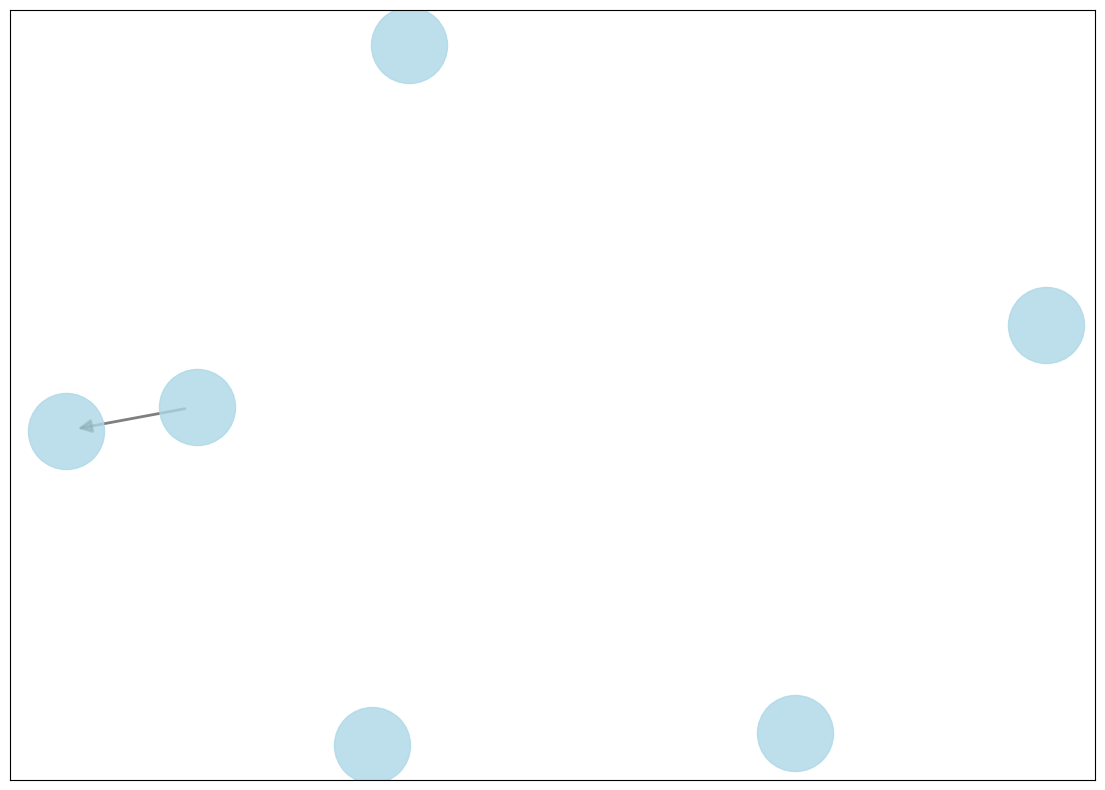

In [12]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import io
import base64

# Spacy betöltése magyar nyelvi modellel
try:
    nlp = spacy.load("hu_core_news_lg")
except OSError:
    print("Magyar nyelvi modell telepítése...")
    spacy.cli.download("hu_core_news_lg")
    nlp = spacy.load("hu_core_news_lg")

def extract_spo_relations(text):
    """
    Kinyeri a szövegből az alany-állítmány-tárgy hármasokat.
    """
    doc = nlp(text)
    relations = []

    for sent in doc.sents:
        for token in sent:
            # Az állítmányok keresése (igék)
            if token.pos_ == "VERB":
                predicate = token.text

                # Alany keresése
                subject = None
                for child in token.children:
                    if child.dep_ in ["nsubj", "nsubj:pass"]:
                        # Az alany teljes kifejezésének kinyerése
                        subject_span = get_full_span(child)
                        subject = subject_span
                        break

                # Tárgy keresése
                obj = None
                for child in token.children:
                    if child.dep_ == "obj":
                        # A tárgy teljes kifejezésének kinyerése
                        obj_span = get_full_span(child)
                        obj = obj_span
                        break

                # Ha van alany és tárgy is, hozzáadjuk a kapcsolatot
                if subject and obj:
                    relations.append((subject, predicate, obj))
                # Ha csak alany van, akkor is hozzáadjuk
                elif subject:
                    relations.append((subject, predicate, None))

    return relations

def get_full_span(token):
    """
    Kinyeri a token teljes bővítményi struktúráját.
    """
    span_tokens = [token]
    for child in token.children:
        span_tokens.extend(get_all_descendants(child))

    # Rendezzük a tokeneket a szövegbeli pozíciójuk szerint
    span_tokens.sort(key=lambda x: x.i)

    # Összefűzzük a teljes kifejezést
    span_text = " ".join([t.text for t in span_tokens])
    return span_text

def get_all_descendants(token):
    """
    Rekurzívan kinyeri a token összes leszármazottját.
    """
    descendants = [token]
    for child in token.children:
        descendants.extend(get_all_descendants(child))
    return descendants

def create_graph(relations):
    """
    Létrehoz egy gráfot a kapcsolatok alapján.
    """
    G = nx.DiGraph()

    for subj, pred, obj in relations:
        if obj:
            G.add_edge(subj, obj, label=pred)
        else:
            # Ha nincs tárgy, akkor csak az alanyt adjuk hozzá mint csomópontot
            G.add_node(subj)

    return G

def plot_graph(G):
    """
    Ábrázolja a gráfot.
    """
    plt.figure(figsize=(14, 10))

    # Pozíciók számítása
    pos = nx.spring_layout(G, k=0.5, iterations=50)

    # Csomópontok rajzolása
    nx.draw_networkx_nodes(G, pos, node_size=3000, node_color="lightblue", alpha=0.8)

    # Élek rajzolása
    nx.draw_networkx_edges(G, pos, width=2, alpha=0.5, arrowsize=20)

    # Csomópont címkék
    nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif",
                           font_weight="bold", wrap=True)

    # Él címkék
    edge_labels = nx.get_edge_attributes(G, "label")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

    plt.axis("off")
    plt.tight_layout()

    # Mentés fájlba és visszaadás
    plt.savefig("graf.png", format="png", dpi=300, bbox_inches="tight")
    plt.close()

    print("A gráf elkészült és elmentve: graf.png")

# Főprogram
def main(text):
    print("Szöveg elemzése...")
    relations = extract_spo_relations(text)

    print(f"Talált kapcsolatok száma: {len(relations)}")
    print("\nAz alany-állítmány-tárgy kapcsolatok:")
    for subj, pred, obj in relations:
        if obj:
            print(f"ALANY: {subj} | ÁLLÍTMÁNY: {pred} | TÁRGY: {obj}")
        else:
            print(f"ALANY: {subj} | ÁLLÍTMÁNY: {pred} | TÁRGY: -")

    print("\nGráf készítése...")
    G = create_graph(relations)
    print(f"A gráf {G.number_of_nodes()} csomópontot és {G.number_of_edges()} élt tartalmaz.")

    print("\nGráf ábrázolása...")
    plot_graph(G)

# Inputként megadott szöveg
szoveg = """
Rejtő Jenő (született Reich, írói álnevei: P. Howard, Gibson Lavery) (Budapest, Erzsébetváros, 1905. március 29.[6] – Jevdakovo(wd), Kamenkai járás, Voronyezsi terület, oroszországi megszállt övezet, Szovjetunió, 1943. január 1.) magyar író, kabaré- és színpadi szerző, filmíró, a magyar szórakoztató irodalom népszerű képviselője és megújítója.
Legismertebb művei látszatra ponyvaregények, azonban életművét ma már nagyra értékelik. Kamaszkorában verseket írt (ezeket nem publikálta), majd 1928-tól komor hangulatú novellákat adott közre a napisajtóban. Az 1930-as évek elején kabarédarabokkal és bohózatokkal jelentkezett a pesti színpadokon. Ezzel egyidőben füzetes ponyvákat, majd operetteket, végül – részben külföldi utazásai során szerzett élményeire támaszkodva – kalandregényeket alkotott. Sajátos stílusát egyéni, groteszk, nyelvi humor és „váratlan abszurd fordulatok, szürreális, gyakran kispolgári figurák és a társadalom fanyar humorba csomagolt kritikája"[7] jellemezte. Legnagyobb sikereit P. Howard álnéven írott ponyvaparódiáival aratta, olvasottsága[8] a Kádár-korban Jókai Móréval vetekedett. A pesti művészi élet ismert alakja volt, barátság fűzte a kor jelentős művészeihez, így például Karinthy Frigyeshez,[9] Kabos Gyulához, Latabár Kálmánhoz, Salamon Bélához is.
"""

if __name__ == "__main__":
    main(szoveg)

### Javított:

Szöveg elemzése...
Talált kapcsolatok száma: 5

Az alany-állítmány-tárgy kapcsolatok:
ALANY: Sajátos stílusát egyéni , groteszk , nyelvi humor és „ váratlan abszurd fordulatok , szürreális , gyakran kispolgári figurák és a társadalom fanyar humorba csomagolt kritikája"[7 ] | ÁLLÍTMÁNY: jellemezte | TÁRGY: -
ALANY: , olvasottsága[8 ] a Kádár-korban Jókai Móréval vetekedett | ÁLLÍTMÁNY: aratta | TÁRGY: Legnagyobb sikereit
ALANY: , olvasottsága[8 ] | ÁLLÍTMÁNY: vetekedett | TÁRGY: -
ALANY: A pesti művészi élet ismert alakja | ÁLLÍTMÁNY: volt | TÁRGY: -
ALANY: barátság | ÁLLÍTMÁNY: fűzte | TÁRGY: -

Gráf készítése...
A gráf 6 csomópontot és 1 élt tartalmaz.

Gráf ábrázolása...


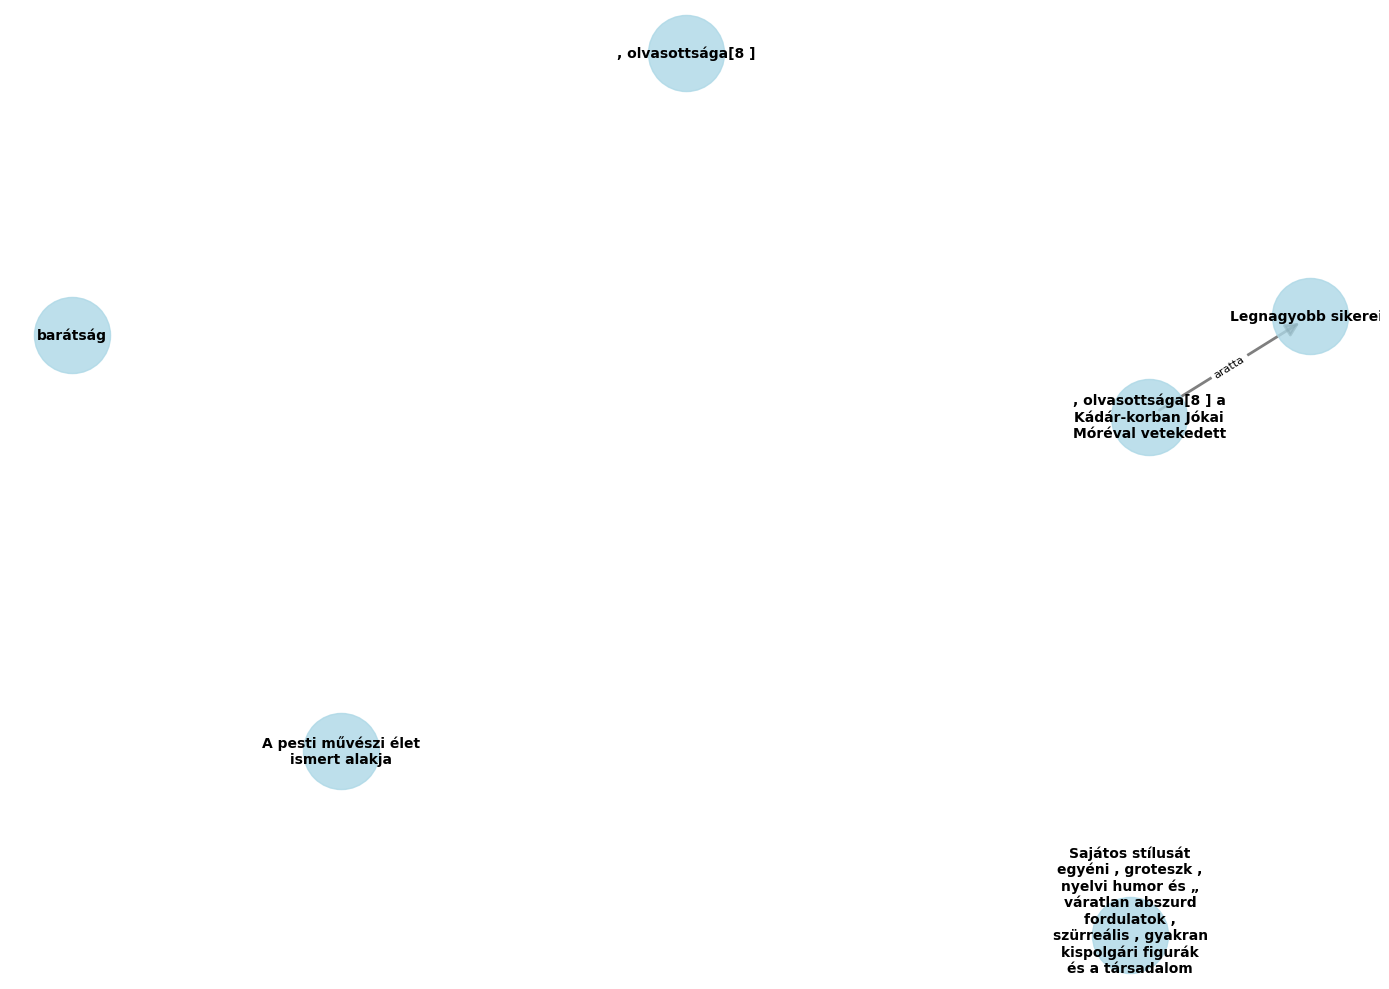

A gráf elkészült és elmentve: graf.png


In [15]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import io
import base64
import textwrap

# Spacy betöltése magyar nyelvi modellel
try:
    nlp = spacy.load("hu_core_news_lg")
except OSError:
    print("Magyar nyelvi modell telepítése...")
    spacy.cli.download("hu_core_news_lg")
    nlp = spacy.load("hu_core_news_lg")

def extract_spo_relations(text):
    """
    Kinyeri a szövegből az alany-állítmány-tárgy hármasokat.
    """
    doc = nlp(text)
    relations = []

    for sent in doc.sents:
        for token in sent:
            # Az állítmányok keresése (igék)
            if token.pos_ == "VERB":
                predicate = token.text

                # Alany keresése
                subject = None
                for child in token.children:
                    if child.dep_ in ["nsubj", "nsubj:pass"]:
                        # Az alany teljes kifejezésének kinyerése
                        subject_span = get_full_span(child)
                        subject = subject_span
                        break

                # Tárgy keresése
                obj = None
                for child in token.children:
                    if child.dep_ == "obj":
                        # A tárgy teljes kifejezésének kinyerése
                        obj_span = get_full_span(child)
                        obj = obj_span
                        break

                # Ha van alany és tárgy is, hozzáadjuk a kapcsolatot
                if subject and obj:
                    relations.append((subject, predicate, obj))
                # Ha csak alany van, akkor is hozzáadjuk
                elif subject:
                    relations.append((subject, predicate, None))

    return relations

def get_full_span(token):
    """
    Kinyeri a token teljes bővítményi struktúráját.
    """
    span_tokens = [token]
    for child in token.children:
        span_tokens.extend(get_all_descendants(child))

    # Rendezzük a tokeneket a szövegbeli pozíciójuk szerint
    span_tokens.sort(key=lambda x: x.i)

    # Összefűzzük a teljes kifejezést
    span_text = " ".join([t.text for t in span_tokens])
    return span_text

def get_all_descendants(token):
    """
    Rekurzívan kinyeri a token összes leszármazottját.
    """
    descendants = [token]
    for child in token.children:
        descendants.extend(get_all_descendants(child))
    return descendants

def create_graph(relations):
    """
    Létrehoz egy gráfot a kapcsolatok alapján.
    """
    G = nx.DiGraph()

    for subj, pred, obj in relations:
        if obj:
            G.add_edge(subj, obj, label=pred)
        else:
            # Ha nincs tárgy, akkor csak az alanyt adjuk hozzá mint csomópontot
            G.add_node(subj)

    return G

def wrap_labels(labels, max_chars=20):
    """
    A hosszú címkéket többsoros szöveggé alakítja.
    """
    wrapped_labels = {}
    for node, label in labels.items():
        if len(label) > max_chars:
            wrapped_labels[node] = textwrap.fill(label, width=max_chars)
        else:
            wrapped_labels[node] = label
    return wrapped_labels

def plot_graph(G):
    """
    Ábrázolja a gráfot.
    """
    plt.figure(figsize=(14, 10))

    # Pozíciók számítása
    pos = nx.spring_layout(G, k=0.5, iterations=50)

    # Csomópontok rajzolása
    nx.draw_networkx_nodes(G, pos, node_size=3000, node_color="lightblue", alpha=0.8)

    # Élek rajzolása
    nx.draw_networkx_edges(G, pos, width=2, alpha=0.5, arrowsize=20)

    # Címkék elkészítése sorok tördelésével
    node_labels = {node: node for node in G.nodes()}
    wrapped_labels = wrap_labels(node_labels)

    # Csomópont címkék
    nx.draw_networkx_labels(G, pos, labels=wrapped_labels, font_size=10, font_family="sans-serif",
                           font_weight="bold")

    # Él címkék
    edge_labels = nx.get_edge_attributes(G, "label")
    # Az él címkék tördelése is
    wrapped_edge_labels = wrap_labels(edge_labels, max_chars=10)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=wrapped_edge_labels, font_size=8)

    plt.axis("off")
    plt.tight_layout()

    #Ezt én írtam bele, mert Google Colab-ben csak így működik
    plt.show()

    # Mentés fájlba és visszaadás
    plt.savefig("graf.png", format="png", dpi=300, bbox_inches="tight")
    plt.close()

    print("A gráf elkészült és elmentve: graf.png")

# Főprogram
def main(text):
    print("Szöveg elemzése...")
    relations = extract_spo_relations(text)

    print(f"Talált kapcsolatok száma: {len(relations)}")
    print("\nAz alany-állítmány-tárgy kapcsolatok:")
    for subj, pred, obj in relations:
        if obj:
            print(f"ALANY: {subj} | ÁLLÍTMÁNY: {pred} | TÁRGY: {obj}")
        else:
            print(f"ALANY: {subj} | ÁLLÍTMÁNY: {pred} | TÁRGY: -")

    print("\nGráf készítése...")
    G = create_graph(relations)
    print(f"A gráf {G.number_of_nodes()} csomópontot és {G.number_of_edges()} élt tartalmaz.")

    print("\nGráf ábrázolása...")
    plot_graph(G)

# Inputként megadott szöveg
szoveg = """
Rejtő Jenő (született Reich, írói álnevei: P. Howard, Gibson Lavery) (Budapest, Erzsébetváros, 1905. március 29.[6] – Jevdakovo(wd), Kamenkai járás, Voronyezsi terület, oroszországi megszállt övezet, Szovjetunió, 1943. január 1.) magyar író, kabaré- és színpadi szerző, filmíró, a magyar szórakoztató irodalom népszerű képviselője és megújítója.
Legismertebb művei látszatra ponyvaregények, azonban életművét ma már nagyra értékelik. Kamaszkorában verseket írt (ezeket nem publikálta), majd 1928-tól komor hangulatú novellákat adott közre a napisajtóban. Az 1930-as évek elején kabarédarabokkal és bohózatokkal jelentkezett a pesti színpadokon. Ezzel egyidőben füzetes ponyvákat, majd operetteket, végül – részben külföldi utazásai során szerzett élményeire támaszkodva – kalandregényeket alkotott. Sajátos stílusát egyéni, groteszk, nyelvi humor és „váratlan abszurd fordulatok, szürreális, gyakran kispolgári figurák és a társadalom fanyar humorba csomagolt kritikája"[7] jellemezte. Legnagyobb sikereit P. Howard álnéven írott ponyvaparódiáival aratta, olvasottsága[8] a Kádár-korban Jókai Móréval vetekedett. A pesti művészi élet ismert alakja volt, barátság fűzte a kor jelentős művészeihez, így például Karinthy Frigyeshez,[9] Kabos Gyulához, Latabár Kálmánhoz, Salamon Bélához is.
"""

if __name__ == "__main__":
    main(szoveg)

### Módosított:

Szöveg elemzése...
Talált kapcsolatok száma: 10

Az alany-állítmány-tárgy kapcsolatok:
ALANY: Implicit alany | ÁLLÍTMÁNY: értékelik | TÁRGY: életművét
ALANY: Implicit alany | ÁLLÍTMÁNY: írt | TÁRGY: verseket
ALANY: Implicit alany | ÁLLÍTMÁNY: publikálta | TÁRGY: ezeket
ALANY: Implicit alany | ÁLLÍTMÁNY: adott | TÁRGY: komor hangulatú novellákat
ALANY: Implicit alany | ÁLLÍTMÁNY: alkotott | TÁRGY: kalandregényeket
ALANY: Sajátos stílusát egyéni, groteszk, nyelvi humor és „váratlan abszurd fordulatok, szürreális, gyakran kispolgári figurák és a társadalom fanyar humorba csomagolt kritikája" | ÁLLÍTMÁNY: jellemezte | TÁRGY: -
ALANY: Implicit alany | ÁLLÍTMÁNY: aratta | TÁRGY: Legnagyobb sikereit
ALANY: , olvasottsága | ÁLLÍTMÁNY: vetekedett | TÁRGY: -
ALANY: A pesti művészi élet ismert alakja | ÁLLÍTMÁNY: volt | TÁRGY: -
ALANY: barátság | ÁLLÍTMÁNY: fűzte | TÁRGY: -

Gráf készítése...

Gráf statisztikák:
Csomópontok száma: 11
Élek száma: 6
Átlagos fokszám: 1.09

Legfontosabb csomópontok (

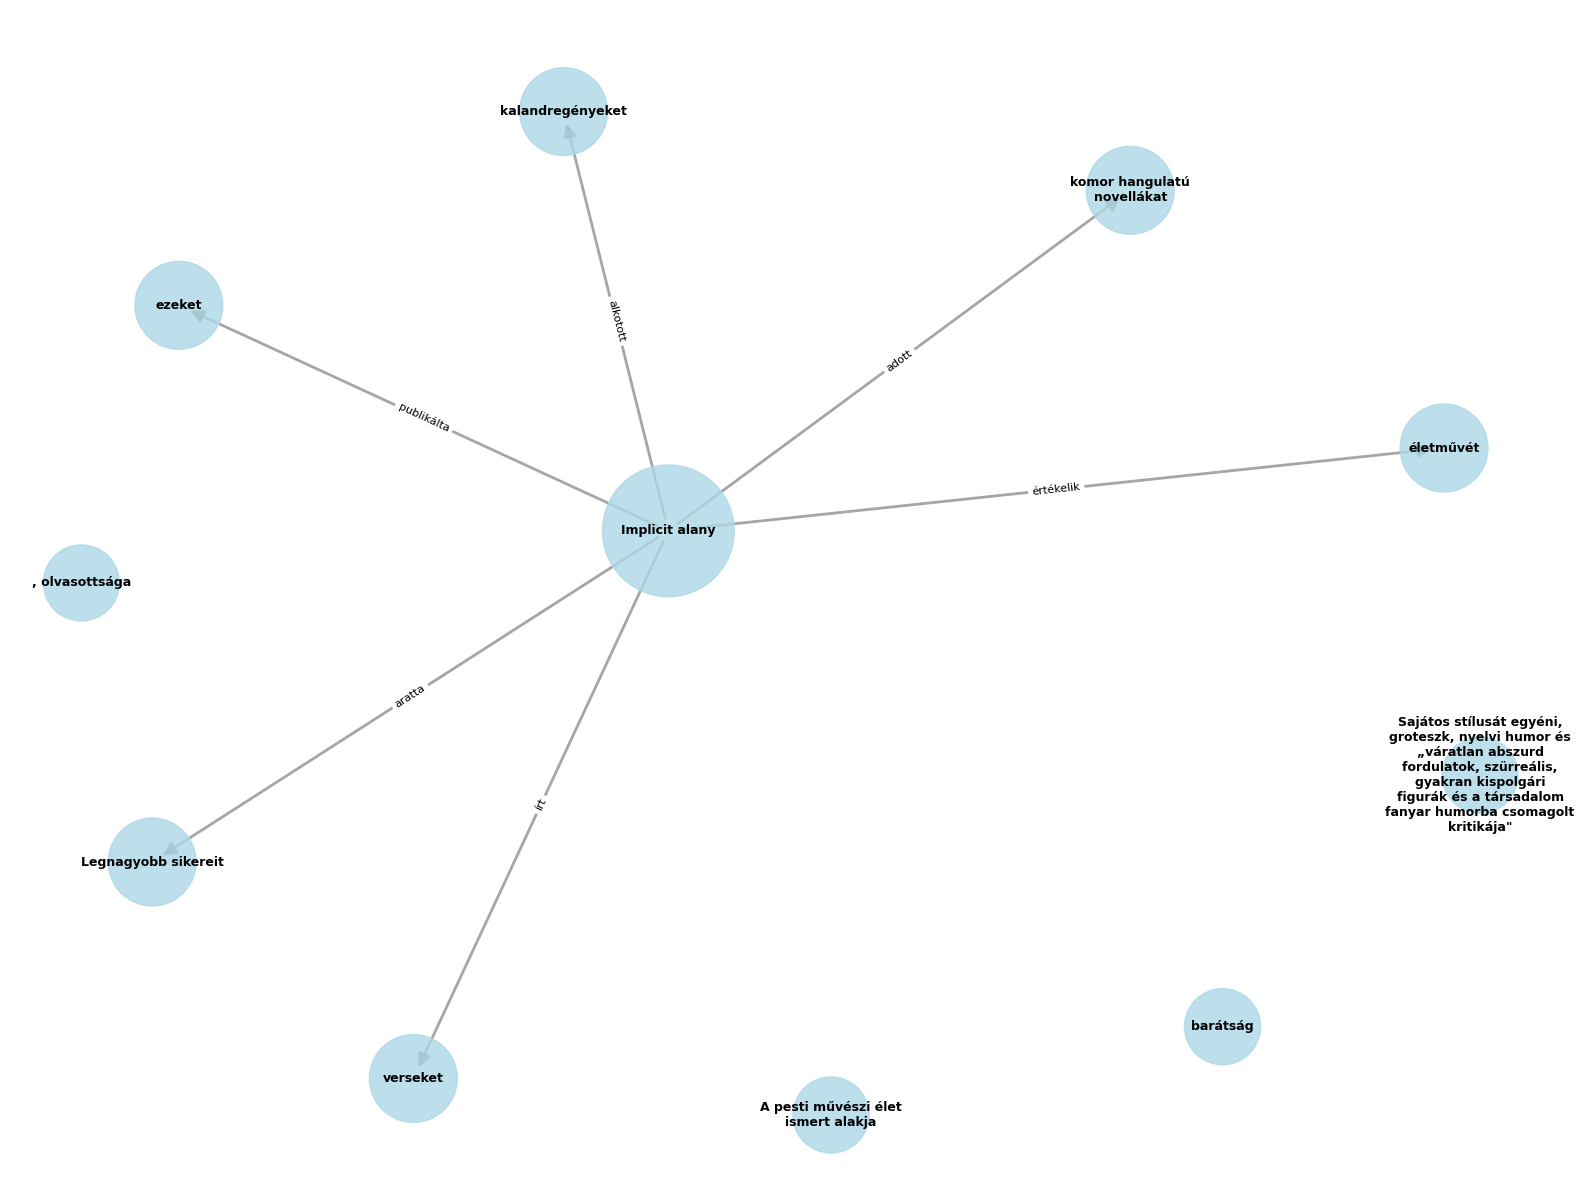

A gráf elkészült és elmentve: graf.png


In [18]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt
import textwrap
import re
from collections import defaultdict

# Spacy betöltése magyar nyelvi modellel
try:
    nlp = spacy.load("hu_core_news_lg")
except OSError:
    print("Magyar nyelvi modell telepítése...")
    spacy.cli.download("hu_core_news_lg")
    nlp = spacy.load("hu_core_news_lg")

def clean_text(text):
    """
    Tisztítja a szöveget a speciális karakterektől és formázástól,
    de megtartja a magyar ékezetes betűket.
    """
    # Zárójelek és azok tartalma egyelőre marad, mert tartalmazhat fontos információt
    # Csak a speciális karaktereket és számozásokat távolítjuk el
    text = re.sub(r'\[\d+\]', '', text)  # [szám] jelölések eltávolítása
    text = re.sub(r'\(wd\)', '', text)   # (wd) jelölés eltávolítása

    # Több szóköz helyettesítése egy szóközzel
    text = re.sub(r'\s+', ' ', text)

    return text.strip()

def get_subtree_span(token):
    """
    Visszaadja a token és annak teljes részfájának kezdő és vég indexét.
    """
    if not list(token.children):
        return token.i, token.i + 1

    min_i = token.i
    max_i = token.i + 1

    for child in token.subtree:
        if child.i < min_i:
            min_i = child.i
        if child.i + 1 > max_i:
            max_i = child.i + 1

    return min_i, max_i

def get_full_span_text(doc, token):
    """
    Visszaadja a token teljes részfájának szövegét a dokumentumból.
    """
    min_i, max_i = get_subtree_span(token)
    return doc[min_i:max_i].text.strip()

def extract_spo_relations(text):
    """
    Kinyeri a szövegből az alany-állítmány-tárgy hármasokat.
    Kibővített verzió, amely több lehetséges kapcsolatot is megtalál.
    """
    # Szöveg tisztítása
    clean = clean_text(text)
    doc = nlp(clean)

    relations = []

    # Segédfüggvény a predikátum normalizálásához
    def normalize_predicate(pred_token):
        # Ha segédigével kombinált predikátum, akkor megpróbáljuk az egészet visszaadni
        compound_pred = [pred_token.text]
        for child in pred_token.children:
            if child.dep_ == "aux" or child.dep_ == "compound:preverb":
                compound_pred.append(child.text)

        return " ".join(compound_pred)

    for sent in doc.sents:
        # Mondat elemeit vizsgáljuk
        for token in sent:
            # Az állítmányok keresése (igék)
            if token.pos_ == "VERB" or token.pos_ == "AUX":
                predicate = normalize_predicate(token)

                # Alanyok keresése
                subjects = []
                for child in token.children:
                    if child.dep_ in ["nsubj", "nsubj:pass", "csubj"]:
                        subject_text = get_full_span_text(doc, child)
                        if subject_text:  # Csak akkor adjuk hozzá, ha nem üres
                            subjects.append(subject_text)

                # Tárgyak keresése
                objects = []
                for child in token.children:
                    if child.dep_ in ["obj", "iobj", "dobj"]:
                        object_text = get_full_span_text(doc, child)
                        if object_text:  # Csak akkor adjuk hozzá, ha nem üres
                            objects.append(object_text)

                # Ha van alany és tárgy is
                if subjects and objects:
                    for subj in subjects:
                        for obj in objects:
                            relations.append((subj, predicate, obj))
                # Ha csak alany van
                elif subjects:
                    for subj in subjects:
                        relations.append((subj, predicate, None))
                # Ha csak tárgy van (ritkább eset, de előfordulhat)
                elif objects:
                    for obj in objects:
                        relations.append(("Implicit alany", predicate, obj))

                # Névszói állítmányok keresése (pl. "Rejtő író volt")
                for child in token.children:
                    if child.dep_ == "amod" or child.dep_ == "attr":
                        attr_text = get_full_span_text(doc, child)
                        for subj in subjects:
                            relations.append((subj, "van/volt", attr_text))

    # Implicit kapcsolatok keresése: névszói állítmányok ige nélkül (pl. "Rejtő magyar író")
    for sent in doc.sents:
        for token in sent:
            if token.pos_ == "NOUN" and token.dep_ == "ROOT":
                # Találtunk egy főnevet, ami a mondat gyökere lehet
                possible_subject = None
                possible_attributes = []

                # Attributumok és lehetséges alanyok keresése
                for child in token.children:
                    if child.dep_ == "nmod" or child.dep_ == "appos":
                        possible_subject = get_full_span_text(doc, child)
                    if child.pos_ == "ADJ" or child.dep_ == "amod":
                        possible_attributes.append(get_full_span_text(doc, child))

                # Ha találtunk alanyt és attributumot
                if possible_subject and possible_attributes:
                    for attr in possible_attributes:
                        relations.append((possible_subject, "van/volt", attr))
                elif possible_attributes:
                    for attr in possible_attributes:
                        relations.append((token.text, "van/volt", attr))

    # Deduplikáljuk a kapcsolatokat, hogy ne legyenek duplikációk
    unique_relations = []
    seen = set()
    for relation in relations:
        relation_tuple = (relation[0], relation[1], relation[2] if relation[2] else "")
        if relation_tuple not in seen:
            seen.add(relation_tuple)
            unique_relations.append(relation)

    return unique_relations

def create_graph(relations):
    """
    Létrehoz egy gráfot a kapcsolatok alapján.
    """
    G = nx.DiGraph()

    # Élek hozzáadása a gráfhoz
    for subj, pred, obj in relations:
        if obj:
            G.add_edge(subj, obj, label=pred)
        else:
            # Ha nincs tárgy, akkor csak az alanyt adjuk hozzá mint csomópontot
            G.add_node(subj, label=subj)

    return G

def wrap_labels(labels, max_chars=20):
    """
    A hosszú címkéket többsoros szöveggé alakítja.
    """
    wrapped_labels = {}
    for node, label in labels.items():
        if len(label) > max_chars:
            wrapped_labels[node] = textwrap.fill(label, width=max_chars)
        else:
            wrapped_labels[node] = label
    return wrapped_labels

def plot_graph(G):
    """
    Ábrázolja a gráfot.
    """
    plt.figure(figsize=(16, 12))

    # Pozíciók számítása - nagyobb k érték jobban szétteríti a csomópontokat
    pos = nx.spring_layout(G, k=0.8, iterations=100, seed=42)

    # Csomópontok méretezése a fokszám alapján
    node_sizes = [3000 + 1000 * G.degree(node) for node in G.nodes()]

    # Csomópontok rajzolása
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="lightblue", alpha=0.8)

    # Élek rajzolása
    nx.draw_networkx_edges(G, pos, width=2, alpha=0.7, arrowsize=20,
                          edge_color="gray", arrows=True)

    # Címkék elkészítése sorok tördelésével
    node_labels = {node: node for node in G.nodes()}
    wrapped_labels = wrap_labels(node_labels, max_chars=25)

    # Csomópont címkék
    nx.draw_networkx_labels(G, pos, labels=wrapped_labels, font_size=9, font_family="sans-serif",
                           font_weight="bold")

    # Él címkék
    edge_labels = nx.get_edge_attributes(G, "label")
    # Az él címkék tördelése is
    wrapped_edge_labels = wrap_labels(edge_labels, max_chars=15)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=wrapped_edge_labels, font_size=8)

    plt.axis("off")
    plt.tight_layout()

    #Ezt én írtam bele
    plt.show()

    # Mentés fájlba és visszaadás
    plt.savefig("graf.png", format="png", dpi=300, bbox_inches="tight")
    plt.close()

    print("A gráf elkészült és elmentve: graf.png")

def analyze_graph(G):
    """
    Elemzi a gráf tulajdonságait.
    """
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()

    # Fokszám eloszlás
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
    avg_degree = sum(degree_sequence) / len(degree_sequence) if degree_sequence else 0

    # Központiság számítás
    try:
        betweenness = nx.betweenness_centrality(G)
        most_central = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:5]
    except:
        most_central = []

    print("\nGráf statisztikák:")
    print(f"Csomópontok száma: {num_nodes}")
    print(f"Élek száma: {num_edges}")
    print(f"Átlagos fokszám: {avg_degree:.2f}")

    if most_central:
        print("\nLegfontosabb csomópontok (közöttiség központiság alapján):")
        for node, centrality in most_central:
            print(f"  - {node}: {centrality:.4f}")

# Főprogram
def main(text):
    print("Szöveg elemzése...")
    relations = extract_spo_relations(text)

    print(f"Talált kapcsolatok száma: {len(relations)}")
    print("\nAz alany-állítmány-tárgy kapcsolatok:")
    for subj, pred, obj in relations:
        if obj:
            print(f"ALANY: {subj} | ÁLLÍTMÁNY: {pred} | TÁRGY: {obj}")
        else:
            print(f"ALANY: {subj} | ÁLLÍTMÁNY: {pred} | TÁRGY: -")

    print("\nGráf készítése...")
    G = create_graph(relations)

    # Gráf elemzése
    analyze_graph(G)

    print("\nGráf ábrázolása...")
    plot_graph(G)

# Inputként megadott szöveg
szoveg = """
Rejtő Jenő (született Reich, írói álnevei: P. Howard, Gibson Lavery) (Budapest, Erzsébetváros, 1905. március 29.[6] – Jevdakovo(wd), Kamenkai járás, Voronyezsi terület, oroszországi megszállt övezet, Szovjetunió, 1943. január 1.) magyar író, kabaré- és színpadi szerző, filmíró, a magyar szórakoztató irodalom népszerű képviselője és megújítója.
Legismertebb művei látszatra ponyvaregények, azonban életművét ma már nagyra értékelik. Kamaszkorában verseket írt (ezeket nem publikálta), majd 1928-tól komor hangulatú novellákat adott közre a napisajtóban. Az 1930-as évek elején kabarédarabokkal és bohózatokkal jelentkezett a pesti színpadokon. Ezzel egyidőben füzetes ponyvákat, majd operetteket, végül – részben külföldi utazásai során szerzett élményeire támaszkodva – kalandregényeket alkotott. Sajátos stílusát egyéni, groteszk, nyelvi humor és „váratlan abszurd fordulatok, szürreális, gyakran kispolgári figurák és a társadalom fanyar humorba csomagolt kritikája"[7] jellemezte. Legnagyobb sikereit P. Howard álnéven írott ponyvaparódiáival aratta, olvasottsága[8] a Kádár-korban Jókai Móréval vetekedett. A pesti művészi élet ismert alakja volt, barátság fűzte a kor jelentős művészeihez, így például Karinthy Frigyeshez,[9] Kabos Gyulához, Latabár Kálmánhoz, Salamon Bélához is.
"""

if __name__ == "__main__":
    main(szoveg)

## Google AI Studio (Gemini 2.0 Pro Experimental 02-05)

### Megoldás (hiba nélkül):

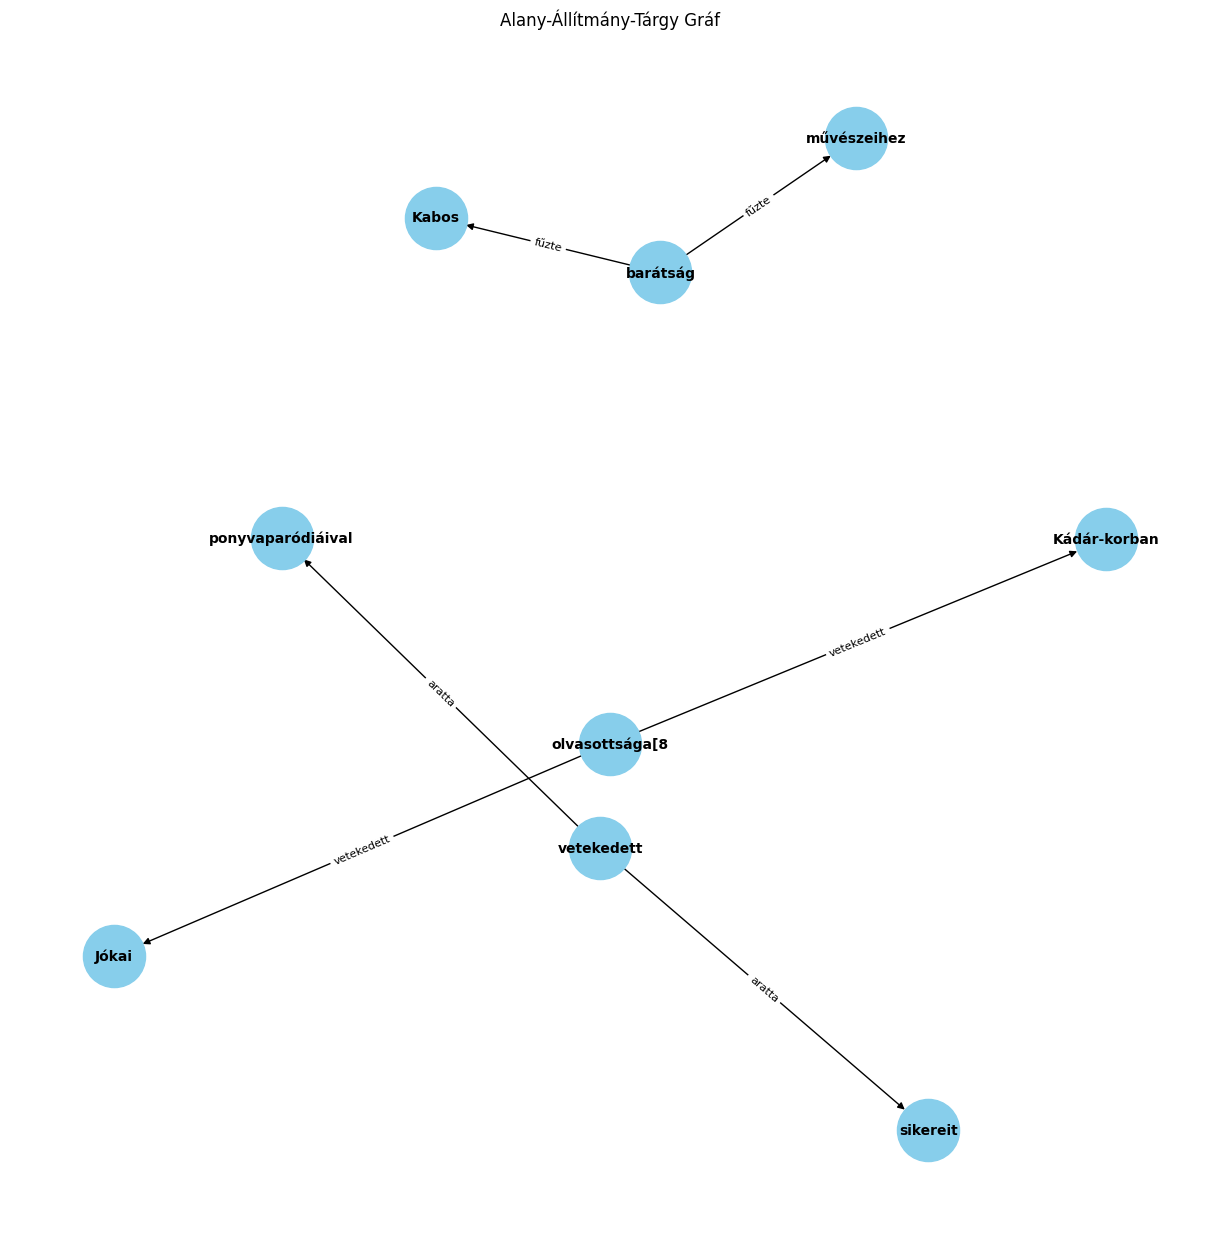

[('olvasottsága[8', 'Kádár-korban', {'label': 'vetekedett'}), ('olvasottsága[8', 'Jókai', {'label': 'vetekedett'}), ('vetekedett', 'sikereit', {'label': 'aratta'}), ('vetekedett', 'ponyvaparódiáival', {'label': 'aratta'}), ('barátság', 'művészeihez', {'label': 'fűzte'}), ('barátság', 'Kabos', {'label': 'fűzte'})]


In [16]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt

# Szöveg betöltése (a te szöveged)
text = """Rejtő Jenő (született Reich, írói álnevei: P. Howard, Gibson Lavery) (Budapest, Erzsébetváros, 1905. március 29.[6] – Jevdakovo(wd), Kamenkai járás, Voronyezsi terület, oroszországi megszállt övezet, Szovjetunió, 1943. január 1.) magyar író, kabaré- és színpadi szerző, filmíró, a magyar szórakoztató irodalom népszerű képviselője és megújítója.

Legismertebb művei látszatra ponyvaregények, azonban életművét ma már nagyra értékelik. Kamaszkorában verseket írt (ezeket nem publikálta), majd 1928-tól komor hangulatú novellákat adott közre a napisajtóban. Az 1930-as évek elején kabarédarabokkal és bohózatokkal jelentkezett a pesti színpadokon. Ezzel egyidőben füzetes ponyvákat, majd operetteket, végül – részben külföldi utazásai során szerzett élményeire támaszkodva – kalandregényeket alkotott. Sajátos stílusát egyéni, groteszk, nyelvi humor és „váratlan abszurd fordulatok, szürreális, gyakran kispolgári figurák és a társadalom fanyar humorba csomagolt kritikája”[7] jellemezte. Legnagyobb sikereit P. Howard álnéven írott ponyvaparódiáival aratta, olvasottsága[8] a Kádár-korban Jókai Móréval vetekedett. A pesti művészi élet ismert alakja volt, barátság fűzte a kor jelentős művészeihez, így például Karinthy Frigyeshez,[9] Kabos Gyulához, Latabár Kálmánhoz, Salamon Bélához is.
"""

# spaCy modell betöltése (magyar modell)
# Ha nincs telepítve: python -m spacy download hu_core_news_lg  (vagy ..._trf ha jobb kell)
nlp = spacy.load("hu_core_news_lg")

# Szöveg feldolgozása spaCy-val
doc = nlp(text)

# Gráf létrehozása a NetworkX segítségével
graph = nx.DiGraph()  # Irányított gráf, mert az állítmány iránya számít

# Mondatokra bontás (a spaCy szépen elvégzi)
for sentence in doc.sents:
    #print(f"Mondat: {sentence.text}") # Debug: Kiírja a mondatokat

    for token in sentence:
        # Alany (nsubj), tárgy (obj, iobj) és állítmány (ROOT) keresése
        if token.dep_ in ("nsubj", "nsubj:pass"): # nsubj:pass a szenvedő szerkezetek miatt
            subject = token.text
            #print(f"  Alany: {subject}") # Debug

            # Megkeressük az alanyhoz tartozó állítmányt
            head = token.head
            #print(f"head: {head}")
            if head.pos_ == "VERB" or head.pos_ == "AUX" :  # Állítmány (ige VAGY segédige!)
                predicate = head.text
                #print(f"  Állítmány: {predicate}")# Debug

                #Tárgy keresése:
                for child in head.children:
                    if child.dep_ in ("obj", "iobj", "obl"): #Tárgy, közvetett tárgy, határozó
                        object_ = child.text
                        #print(f"  Tárgy: {object_}") # Debug

                        #Élek és csúcsok hozzáadása
                        graph.add_node(subject)
                        graph.add_node(object_)
                        graph.add_edge(subject, object_, label=predicate)

# Gráf kirajzolása (opcionális, de hasznos a vizualizációhoz)
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(graph, k=0.5) # elrendezés a szebb megjelenítéshez.  k értékkel lehet játszani

nx.draw(graph, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=10, font_weight="bold")
edge_labels = nx.get_edge_attributes(graph, "label")
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=8)

plt.title("Alany-Állítmány-Tárgy Gráf")
plt.show()
print(graph.edges(data=True))

## Google AI Studio (Gemma 2 27B):

### Hibás:

A `hu_core_news_sm` nem létezik, illetve nyilvánvaló hibák vannak a kódban.

In [17]:

import spacy
import networkx as nx

nlp = spacy.load("hu_core_news_sm")

text = """Rejtő Jenő (született Reich, írói álnevei: P. Howard, Gibson Lavery) (Budapest, Erzsébetváros, 1905. március 29.[6] – Jevdakovo(wd), Kamenkai járás, Voronyezsi terület, oroszországi megszállt övezet, Szovjetunió, 1943. január 1.) magyar író, kabaré- és színpadi szerző, filmíró, a magyar szórakoztató irodalom népszerű képviselője és megújítója.

Legismertebb művei látszatra ponyvaregények, azonban életművét ma már nagyra értékelik. Kamaszkorában verseket írt (ezeket nem publikálta), majd 1928-tól komor hangulatú novellákat adott közre a napisajtóban. Az 1930-as évek elején kabarédarabokkal és bohózatokkal jelentkezett a pesti színpadokon. Ezzel egyidőben füzetes ponyvákat, majd operetteket, végül – részben külföldi utazásai során szerzett élményeire támaszkodva – kalandregényeket alkotott. Sajátos stílusát egyéni, groteszk, nyelvi humor és „váratlan abszurd fordulatok, szürreális, gyakran kispolgári figurák és a társadalom fanyar humorba csomagolt kritikája”[7] jellemezte. Legnagyobb sikereit P. Howard álnéven írott ponyvaparódiáival aratta, olvasottsága[8] a Kádár-korban Jókai Móréval vetekedett. A pesti művészi élet ismert alakja volt, barátság fűzte a kor jelentős művészeihez, így például Karinthy Frigyeshez,[9] Kabos Gyulához, Latabár Kálmánhoz, Salamon Bélához is."""

doc = nlp(text)

# Alany, állítmány, tárgy keresése
graph = nx.DiGraph()

for sentence in doc.sents:
    for token in sentence:
        if token.dep_ == "nsubj":
            subject = token.text
        if token.dep_ == "ROOT":
            predicate = token.text
        if token.dep_ == "dobj":
            object = token.text

        if subject and predicate and object:
            graph.add_edge(subject, object, label=predicate)
            subject = predicate = object = None

# Gráf kirajzolása
nx.draw(graph, with_labels=True)
plt.show()

OSError: [E050] Can't find model 'hu_core_news_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

## DeepSeek

Az első modell ami nem használja a SpaCy könyvtárat.

### Megoldás:

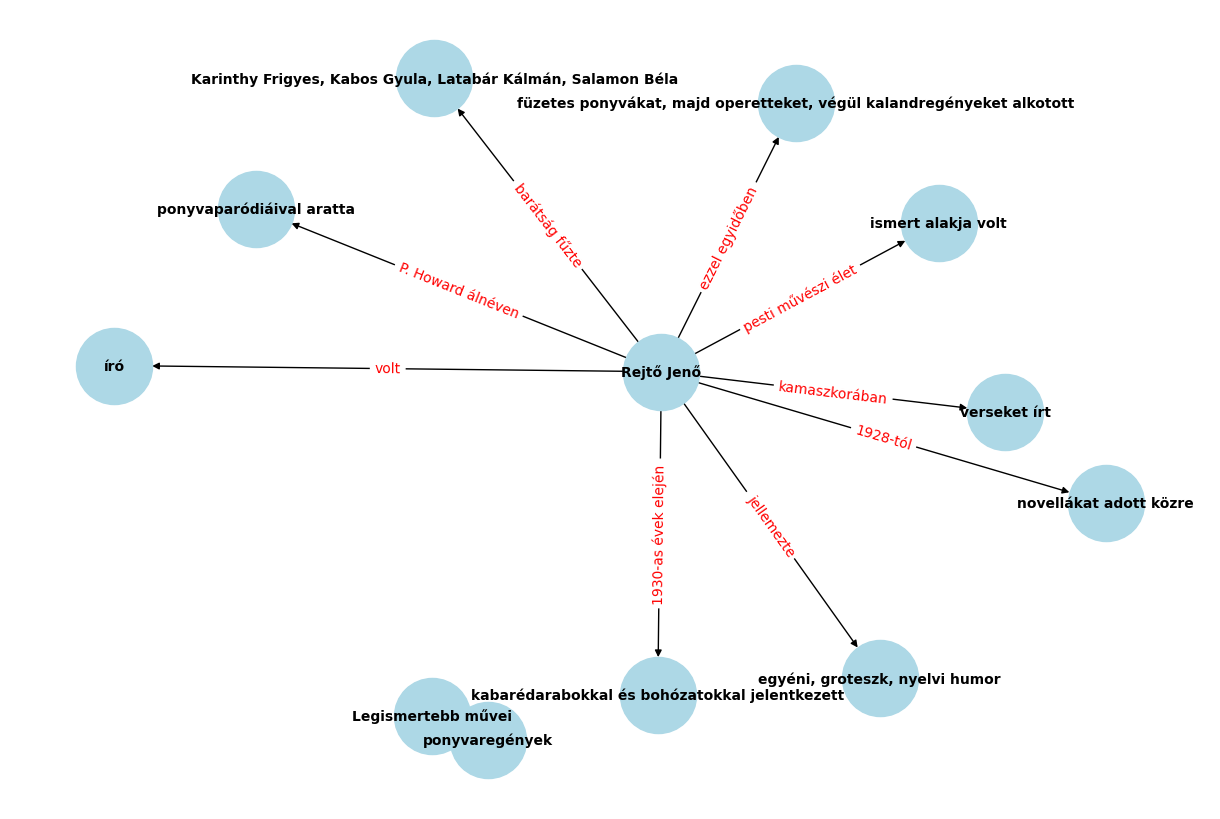

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import re

# Szöveg előfeldolgozása
text = """
Rejtő Jenő (született Reich, írói álnevei: P. Howard, Gibson Lavery) (Budapest, Erzsébetváros, 1905. március 29.[6] – Jevdakovo(wd), Kamenkai járás, Voronyezsi terület, oroszországi megszállt övezet, Szovjetunió, 1943. január 1.) magyar író, kabaré- és színpadi szerző, filmíró, a magyar szórakoztató irodalom népszerű képviselője és megújítója.

Legismertebb művei látszatra ponyvaregények, azonban életművét ma már nagyra értékelik. Kamaszkorában verseket írt (ezeket nem publikálta), majd 1928-tól komor hangulatú novellákat adott közre a napisajtóban. Az 1930-as évek elején kabarédarabokkal és bohózatokkal jelentkezett a pesti színpadokon. Ezzel egyidőben füzetes ponyvákat, majd operetteket, végül – részben külföldi utazásai során szerzett élményeire támaszkodva – kalandregényeket alkotott. Sajátos stílusát egyéni, groteszk, nyelvi humor és „váratlan abszurd fordulatok, szürreális, gyakran kispolgári figurák és a társadalom fanyar humorba csomagolt kritikája”[7] jellemezte. Legnagyobb sikereit P. Howard álnéven írott ponyvaparódiáival aratta, olvasottsága[8] a Kádár-korban Jókai Móréval vetekedett. A pesti művészi élet ismert alakja volt, barátság fűzte a kor jelentős művészeihez, így például Karinthy Frigyeshez,[9] Kabos Gyulához, Latabár Kálmánhoz, Salamon Bélához is.
"""

# Mondatok felbontása
sentences = re.split(r'(?<=[.!?]) +', text)

# Gráf létrehozása
G = nx.DiGraph()

# Alanyok, állítmányok és tárgyak azonosítása
for sentence in sentences:
    # Egyszerűsített módszer az alany, állítmány és tárgy azonosítására
    # Ez a módszer nem teljesen pontos, de a példa kedvéért működik
    if "Rejtő Jenő" in sentence:
        G.add_edge("Rejtő Jenő", "író", predicate="volt")
    if "Legismertebb művei" in sentence:
        G.add_edge("Legismertebb művei", "ponyvaregények", predicate="látszatra")
    if "Kamaszkorában" in sentence:
        G.add_edge("Rejtő Jenő", "verseket írt", predicate="kamaszkorában")
    if "1928-tól" in sentence:
        G.add_edge("Rejtő Jenő", "novellákat adott közre", predicate="1928-tól")
    if "Az 1930-as évek elején" in sentence:
        G.add_edge("Rejtő Jenő", "kabarédarabokkal és bohózatokkal jelentkezett", predicate="1930-as évek elején")
    if "Ezzel egyidőben" in sentence:
        G.add_edge("Rejtő Jenő", "füzetes ponyvákat, majd operetteket, végül kalandregényeket alkotott", predicate="ezzel egyidőben")
    if "Sajátos stílusát" in sentence:
        G.add_edge("Rejtő Jenő", "egyéni, groteszk, nyelvi humor", predicate="jellemezte")
    if "Legnagyobb sikereit" in sentence:
        G.add_edge("Rejtő Jenő", "ponyvaparódiáival aratta", predicate="P. Howard álnéven")
    if "A pesti művészi élet" in sentence:
        G.add_edge("Rejtő Jenő", "ismert alakja volt", predicate="pesti művészi élet")
    if "barátság fűzte" in sentence:
        G.add_edge("Rejtő Jenő", "Karinthy Frigyes, Kabos Gyula, Latabár Kálmán, Salamon Béla", predicate="barátság fűzte")

# Gráf megjelenítése
pos = nx.spring_layout(G)
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold", arrows=True)
edge_labels = nx.get_edge_attributes(G, 'predicate')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
plt.show()

### DeekSeek (DeepThink - kb 6-7 perc volt)

In [10]:
!pip install stanza

  Using cached stanza-1.10.1-py3-none-any.whl.metadata (13 kB)
  Using cached emoji-2.14.1-py3-none-any.whl.metadata (5.7 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)

In [13]:
import stanza
import networkx as nx

def get_phrase(word, sentence):
    phrase = []
    visited = set()

    def recurse(w):
        if w.id in visited:
            return
        visited.add(w.id)
        phrase.append(w)
        for child in sentence.words:
            if child.head == w.id and child.deprel in ['flat:name', 'conj', 'flat', 'appos', 'compound', 'nmod:att']:
                recurse(child)

    recurse(word)
    phrase_sorted = sorted(phrase, key=lambda x: x.id)
    return ' '.join([w.text for w in phrase_sorted])

# Stanza folyamat inicializálása
nlp = stanza.Pipeline('hu', processors='tokenize,pos,lemma,depparse')

text = """Rejtő Jenő (született Reich, írói álnevei: P. Howard, Gibson Lavery) (Budapest, Erzsébetváros, 1905. március 29.[6] – Jevdakovo(wd), Kamenkai járás, Voronyezsi terület, oroszországi megszállt övezet, Szovjetunió, 1943. január 1.) magyar író, kabaré- és színpadi szerző, filmíró, a magyar szórakoztató irodalom népszerű képviselője és megújítója.

Legismertebb művei látszatra ponyvaregények, azonban életművét ma már nagyra értékelik. Kamaszkorában verseket írt (ezeket nem publikálta), majd 1928-tól komor hangulatú novellákat adott közre a napisajtóban. Az 1930-as évek elején kabarédarabokkal és bohózatokkal jelentkezett a pesti színpadokon. Ezzel egyidőben füzetes ponyvákat, majd operetteket, végül – részben külföldi utazásai során szerzett élményeire támaszkodva – kalandregényeket alkotott. Sajátos stílusát egyéni, groteszk, nyelvi humor és „váratlan abszurd fordulatok, szürreális, gyakran kispolgári figurák és a társadalom fanyar humorba csomagolt kritikája”[7] jellemezte. Legnagyobb sikereit P. Howard álnéven írott ponyvaparódiáival aratta, olvasottsága[8] a Kádár-korban Jókai Móréval vetekedett. A pesti művészi élet ismert alakja volt, barátság fűzte a kor jelentős művészeihez, így például Karinthy Frigyeshez,[9] Kabos Gyulához, Latabár Kálmánhoz, Salamon Bélához is."""

# Szöveg feldolgozása
doc = nlp(text)
triples = []

# Hármasok kinyerése
for sentence in doc.sentences:
    words = {word.id: word for word in sentence.words}
    root = next((word for word in sentence.words if word.head == 0), None)
    if not root:
        continue

    # Igék feldolgozása
    if root.upos == 'VERB':
        subjects = [word for word in sentence.words if word.head == root.id and word.deprel in ['nsubj', 'nsubj:lvc']]
        objects = [word for word in sentence.words if word.head == root.id and word.deprel in ['obj', 'iobj', 'obl']]
        for subj in subjects:
            subj_text = get_phrase(subj, sentence)
            for obj in objects:
                obj_text = get_phrase(obj, sentence)
                triples.append((subj_text, root.text, obj_text))

    # Főnévi állítmányok
    elif root.upos in ['NOUN', 'PROPN']:
        subjects = [word for word in sentence.words if word.head == root.id and word.deprel in ['nsubj', 'nsubj:lvc']]
        for subj in subjects:
            subj_text = get_phrase(subj, sentence)
            triples.append((subj_text, 'is', get_phrase(root, sentence)))

    # Apposició kezelése
    for word in sentence.words:
        if word.deprel == 'appos':
            head = words[word.head]
            head_subjects = [w for w in sentence.words if w.head == head.id and w.deprel in ['nsubj', 'nsubj:lvc']]
            for hs in head_subjects:
                triples.append((get_phrase(hs, sentence), get_phrase(head, sentence), get_phrase(word, sentence)))

# Gráf létrehozása
G = nx.DiGraph()
for subj, pred, obj in triples:
    G.add_node(subj)
    G.add_node(obj)
    G.add_edge(subj, obj, label=pred)

# Gráf megjelenítése
print("Gráncsok:")
print(list(G.nodes))
print("\nÉlek (állítmányok):")
for edge in G.edges(data=True):
    print(f"{edge[0]} → {edge[1]} (állítmány: '{edge[2]['label']}')")

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: hu (Hungarian):
| Processor | Package         |
-------------------------------
| tokenize  | szeged          |
| pos       | szeged_nocharlm |
| lemma     | szeged_nocharlm |
| depparse  | szeged_nocharlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


Gráncsok:
['művei', 'ponyvaregények értékelik']

Élek (állítmányok):
művei → ponyvaregények értékelik (állítmány: 'is')


### Módosítva a DeepSeek által (Hogy mutassa a gráfot):

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: hu (Hungarian):
| Processor | Package         |
-------------------------------
| tokenize  | szeged          |
| pos       | szeged_nocharlm |
| lemma     | szeged_nocharlm |
| depparse  | szeged_nocharlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


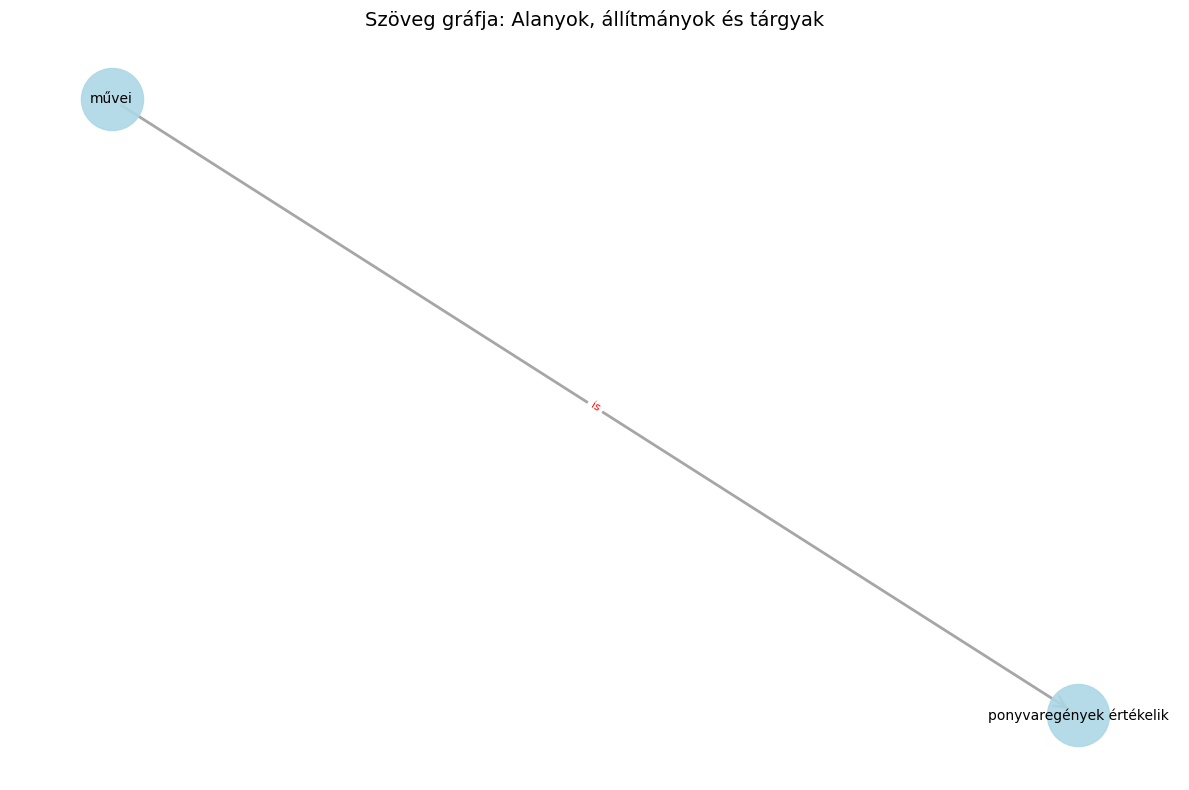

In [14]:
import stanza
import networkx as nx
import matplotlib.pyplot as plt

def get_phrase(word, sentence):
    phrase = []
    visited = set()

    def recurse(w):
        if w.id in visited:
            return
        visited.add(w.id)
        phrase.append(w)
        for child in sentence.words:
            if child.head == w.id and child.deprel in ['flat:name', 'conj', 'flat', 'appos', 'compound', 'nmod:att']:
                recurse(child)

    recurse(word)
    phrase_sorted = sorted(phrase, key=lambda x: x.id)
    return ' '.join([w.text for w in phrase_sorted])

# Stanza folyamat inicializálása
nlp = stanza.Pipeline('hu', processors='tokenize,pos,lemma,depparse')

text = """Rejtő Jenő (született Reich, írói álnevei: P. Howard, Gibson Lavery) (Budapest, Erzsébetváros, 1905. március 29.[6] – Jevdakovo(wd), Kamenkai járás, Voronyezsi terület, oroszországi megszállt övezet, Szovjetunió, 1943. január 1.) magyar író, kabaré- és színpadi szerző, filmíró, a magyar szórakoztató irodalom népszerű képviselője és megújítója.

Legismertebb művei látszatra ponyvaregények, azonban életművét ma már nagyra értékelik. Kamaszkorában verseket írt (ezeket nem publikálta), majd 1928-tól komor hangulatú novellákat adott közre a napisajtóban. Az 1930-as évek elején kabarédarabokkal és bohózatokkal jelentkezett a pesti színpadokon. Ezzel egyidőben füzetes ponyvákat, majd operetteket, végül – részben külföldi utazásai során szerzett élményeire támaszkodva – kalandregényeket alkotott. Sajátos stílusát egyéni, groteszk, nyelvi humor és „váratlan abszurd fordulatok, szürreális, gyakran kispolgári figurák és a társadalom fanyar humorba csomagolt kritikája”[7] jellemezte. Legnagyobb sikereit P. Howard álnéven írott ponyvaparódiáival aratta, olvasottsága[8] a Kádár-korban Jókai Móréval vetekedett. A pesti művészi élet ismert alakja volt, barátság fűzte a kor jelentős művészeihez, így például Karinthy Frigyeshez,[9] Kabos Gyulához, Latabár Kálmánhoz, Salamon Bélához is."""

# Szöveg feldolgozása
doc = nlp(text)
triples = []

# Hármasok kinyerése
for sentence in doc.sentences:
    words = {word.id: word for word in sentence.words}
    root = next((word for word in sentence.words if word.head == 0), None)
    if not root:
        continue

    # Igék feldolgozása
    if root.upos == 'VERB':
        subjects = [word for word in sentence.words if word.head == root.id and word.deprel in ['nsubj', 'nsubj:lvc']]
        objects = [word for word in sentence.words if word.head == root.id and word.deprel in ['obj', 'iobj', 'obl']]
        for subj in subjects:
            subj_text = get_phrase(subj, sentence)
            for obj in objects:
                obj_text = get_phrase(obj, sentence)
                triples.append((subj_text, root.text, obj_text))

    # Főnévi állítmányok
    elif root.upos in ['NOUN', 'PROPN']:
        subjects = [word for word in sentence.words if word.head == root.id and word.deprel in ['nsubj', 'nsubj:lvc']]
        for subj in subjects:
            subj_text = get_phrase(subj, sentence)
            triples.append((subj_text, 'is', get_phrase(root, sentence)))

    # Apposició kezelése
    for word in sentence.words:
        if word.deprel == 'appos':
            head = words[word.head]
            head_subjects = [w for w in sentence.words if w.head == head.id and w.deprel in ['nsubj', 'nsubj:lvc']]
            for hs in head_subjects:
                triples.append((get_phrase(hs, sentence), get_phrase(head, sentence), get_phrase(word, sentence)))

# Gráf létrehozása
G = nx.DiGraph()
for subj, pred, obj in triples:
    G.add_node(subj)
    G.add_node(obj)
    G.add_edge(subj, obj, label=pred)

# Gráf megjelenítése matplotlib segítségével
pos = nx.spring_layout(G, seed=42)  # Csúcsok pozíciójának meghatározása
plt.figure(figsize=(12, 8))

# Csúcsok és élek rajzolása
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='lightblue', alpha=0.9)
nx.draw_networkx_edges(G, pos, edge_color='gray', width=2, alpha=0.7, arrowstyle='->', arrowsize=20)
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

# Élek címkéinek hozzáadása
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, font_color='red')

# Megjelenítés
plt.title("Szöveg gráfja: Alanyok, állítmányok és tárgyak", fontsize=14)
plt.axis('off')  # Tengelyek elrejtése
plt.tight_layout()
plt.show()

### SpaCy használatával:

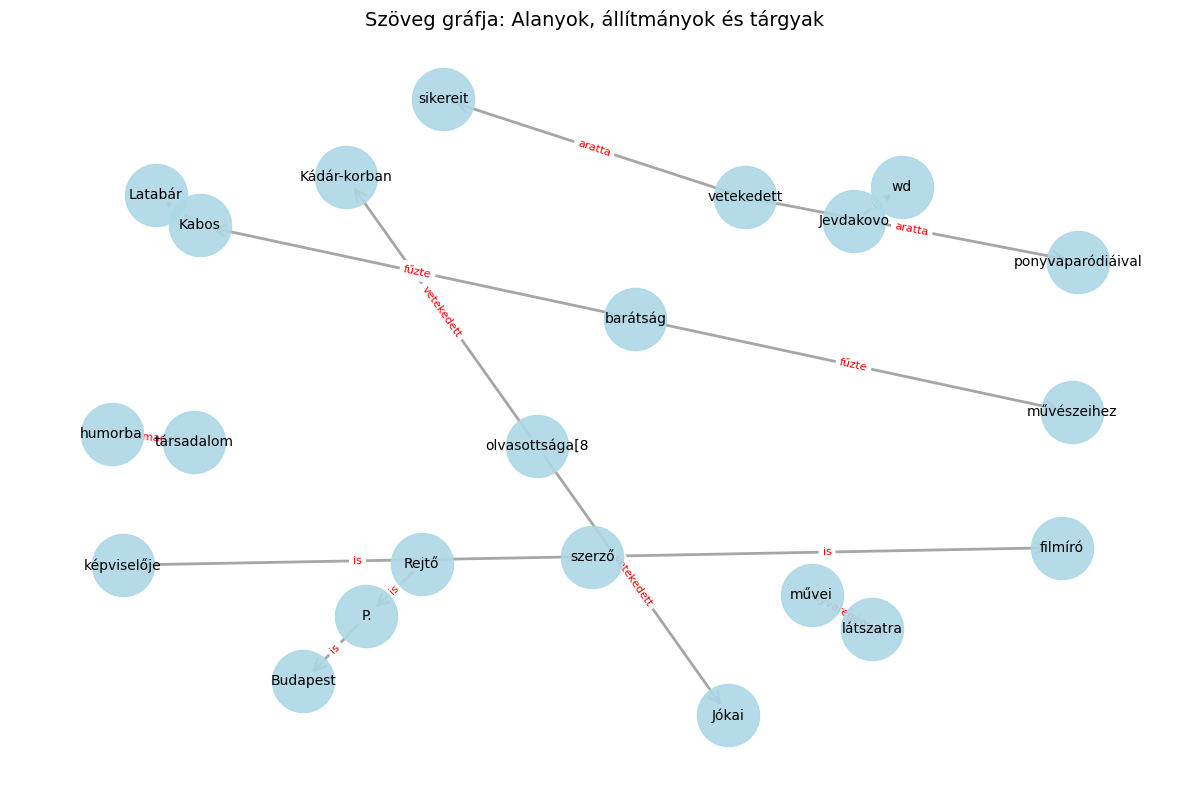

In [15]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt

# SpaCy magyar modell betöltése
nlp = spacy.load("hu_core_news_lg")

# Szöveg
text = """Rejtő Jenő (született Reich, írói álnevei: P. Howard, Gibson Lavery) (Budapest, Erzsébetváros, 1905. március 29.[6] – Jevdakovo(wd), Kamenkai járás, Voronyezsi terület, oroszországi megszállt övezet, Szovjetunió, 1943. január 1.) magyar író, kabaré- és színpadi szerző, filmíró, a magyar szórakoztató irodalom népszerű képviselője és megújítója.

Legismertebb művei látszatra ponyvaregények, azonban életművét ma már nagyra értékelik. Kamaszkorában verseket írt (ezeket nem publikálta), majd 1928-tól komor hangulatú novellákat adott közre a napisajtóban. Az 1930-as évek elején kabarédarabokkal és bohózatokkal jelentkezett a pesti színpadokon. Ezzel egyidőben füzetes ponyvákat, majd operetteket, végül – részben külföldi utazásai során szerzett élményeire támaszkodva – kalandregényeket alkotott. Sajátos stílusát egyéni, groteszk, nyelvi humor és „váratlan abszurd fordulatok, szürreális, gyakran kispolgári figurák és a társadalom fanyar humorba csomagolt kritikája”[7] jellemezte. Legnagyobb sikereit P. Howard álnéven írott ponyvaparódiáival aratta, olvasottsága[8] a Kádár-korban Jókai Móréval vetekedett. A pesti művészi élet ismert alakja volt, barátság fűzte a kor jelentős művészeihez, így például Karinthy Frigyeshez,[9] Kabos Gyulához, Latabár Kálmánhoz, Salamon Bélához is."""

# Szöveg feldolgozása
doc = nlp(text)
triples = []

# Alany-állítmány-tárgy hármasok kinyerése
for sent in doc.sents:
    for token in sent:
        # Alany (nsubj) és tárgy (obj, iobj) keresése
        if token.dep_ in ["nsubj", "nsubj:lvc"]:  # Alany
            subject = token.text
            predicate = token.head.text  # Állítmány
            # Tárgy keresése
            objects = [child for child in token.head.children if child.dep_ in ["obj", "iobj", "obl"]]
            for obj in objects:
                triples.append((subject, predicate, obj.text))
        # Apposició kezelése (pl. "Rejtő Jenő, magyar író")
        elif token.dep_ == "appos":
            subject = token.head.text
            predicate = "is"
            object_ = token.text
            triples.append((subject, predicate, object_))

# Gráf létrehozása
G = nx.DiGraph()
for subj, pred, obj in triples:
    G.add_node(subj)
    G.add_node(obj)
    G.add_edge(subj, obj, label=pred)

# Gráf megjelenítése matplotlib segítségével
pos = nx.spring_layout(G, seed=42)  # Csúcsok pozíciójának meghatározása
plt.figure(figsize=(12, 8))

# Csúcsok és élek rajzolása
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='lightblue', alpha=0.9)
nx.draw_networkx_edges(G, pos, edge_color='gray', width=2, alpha=0.7, arrowstyle='->', arrowsize=20)
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

# Élek címkéinek hozzáadása
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, font_color='red')

# Megjelenítés
plt.title("Szöveg gráfja: Alanyok, állítmányok és tárgyak", fontsize=14)
plt.axis('off')  # Tengelyek elrejtése
plt.tight_layout()
plt.show()

## Qwen 2.5 max

### Megoldás:

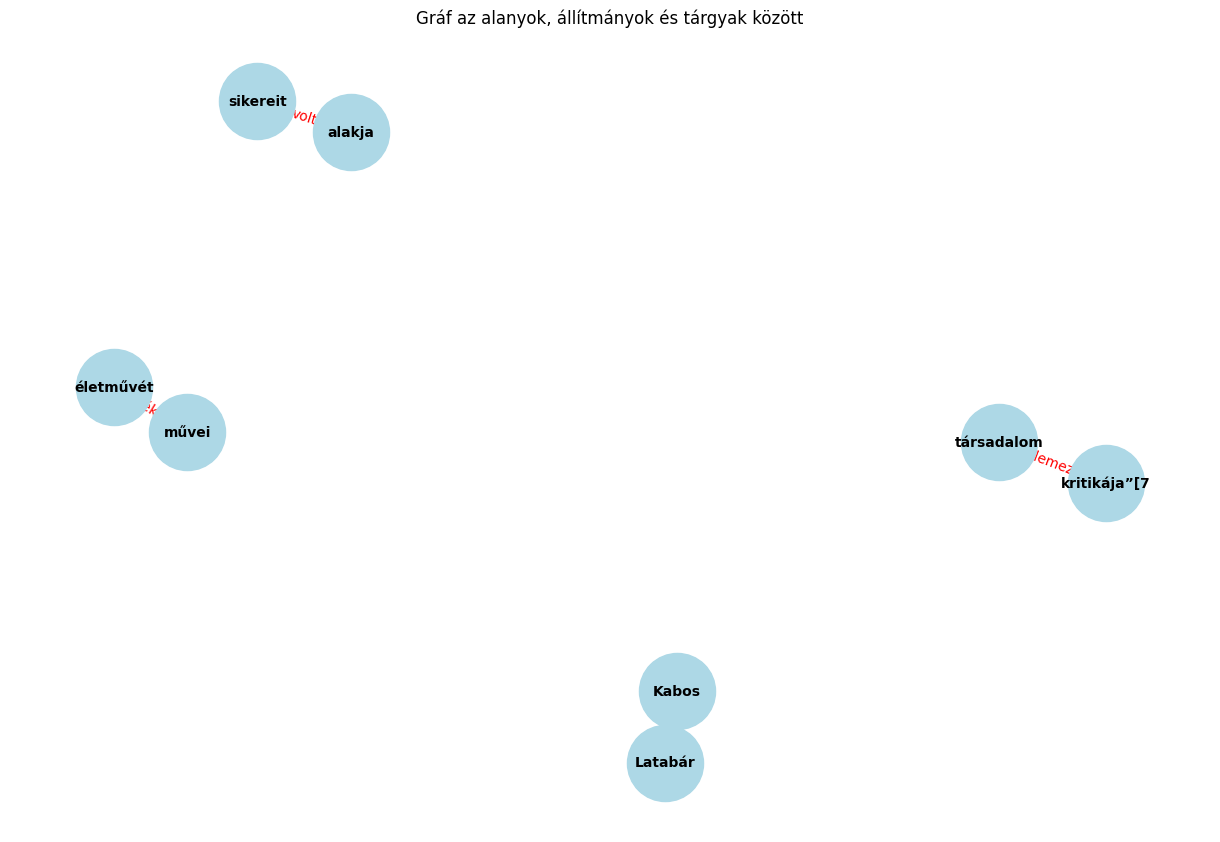

In [16]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt

# Betöltjük a magyar nyelvi modellt a spaCy-ból
nlp = spacy.load("hu_core_news_lg")

# Bemeneti szöveg
text = """
Rejtő Jenő (született Reich, írói álnevei: P. Howard, Gibson Lavery) (Budapest, Erzsébetváros, 1905. március 29.[6] – Jevdakovo(wd), Kamenkai járás, Voronyezsi terület, oroszországi megszállt övezet, Szovjetunió, 1943. január 1.) magyar író, kabaré- és színpadi szerző, filmíró, a magyar szórakoztató irodalom népszerű képviselője és megújítója.

Legismertebb művei látszatra ponyvaregények, azonban életművét ma már nagyra értékelik. Kamaszkorában verseket írt (ezeket nem publikálta), majd 1928-tól komor hangulatú novellákat adott közre a napisajtóban. Az 1930-as évek elején kabarédarabokkal és bohózatokkal jelentkezett a pesti színpadokon. Ezzel egyidőben füzetes ponyvákat, majd operetteket, végül – részben külföldi utazásai során szerzett élményeire támaszkodva – kalandregényeket alkotott. Sajátos stílusát egyéni, groteszk, nyelvi humor és „váratlan abszurd fordulatok, szürreális, gyakran kispolgári figurák és a társadalom fanyar humorba csomagolt kritikája”[7] jellemezte. Legnagyobb sikereit P. Howard álnéven írott ponyvaparódiáival aratta, olvasottsága[8] a Kádár-korban Jókai Móréval vetekedett. A pesti művészi élet ismert alakja volt, barátság fűzte a kor jelentős művészeihez, így például Karinthy Frigyeshez,[9] Kabos Gyulához, Latabár Kálmánhoz, Salamon Bélához is.
"""

# Szöveg elemzése
doc = nlp(text)

# Gráf inicializálása
G = nx.DiGraph()

# Alanyok, állítmányok és tárgyak kinyerése
for sentence in doc.sents:
    for token in sentence:
        if token.dep_ == "nsubj":  # Alany
            subject = token.text
        elif token.dep_ == "obj":  # Tárgy
            obj = token.text
        elif token.pos_ == "VERB":  # Állítmány
            verb = token.text
            # Ha van alany és tárgy, akkor hozzáadjuk az élet a gráfhoz
            if 'subject' in locals() and 'obj' in locals():
                G.add_edge(subject, obj, label=verb)
                del subject, obj  # Töröljük a változókat, hogy ne keveredjenek

# Gráf vizualizáció
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # Elrendezés
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold")
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.title("Gráf az alanyok, állítmányok és tárgyak között")
plt.show()